# **CONVOLUTION NEURAL NETWORK** 

## **Importing the library**

In [ ]:
import tensorflow as tf


## **Importing the Python Modules.**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline 

from keras.datasets  import mnist     # MNIST dataset is included in Keras
from keras. models import Sequential  # Model type to be used

from keras.layers.core import Dense, Dropout, Activation # Types of layers to be used in our model
from keras.utils import np_utils 


from keras.preprocessing.image import ImageDataGenerator

from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten

from tensorflow.keras.layers import BatchNormalization

## **Loading Training Data**

The MINIST dataset is analysed within keras.

The MNIST data is split between 60,000 28 x 28 pixel training images and 10,00

In [ ]:
(X_train, y_train),(X_test,y_test)= mnist.load_data()

print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)


11490434/11490434 [==============================] - 0s 0us/step
X_train (60000, 28, 28)
y_train (60000,)
X_test (10000, 28, 28)
y_test (10000,)


## **Plotting the samples images in MNIST.**

Some sample images from the training set is plotted using matplotlib.



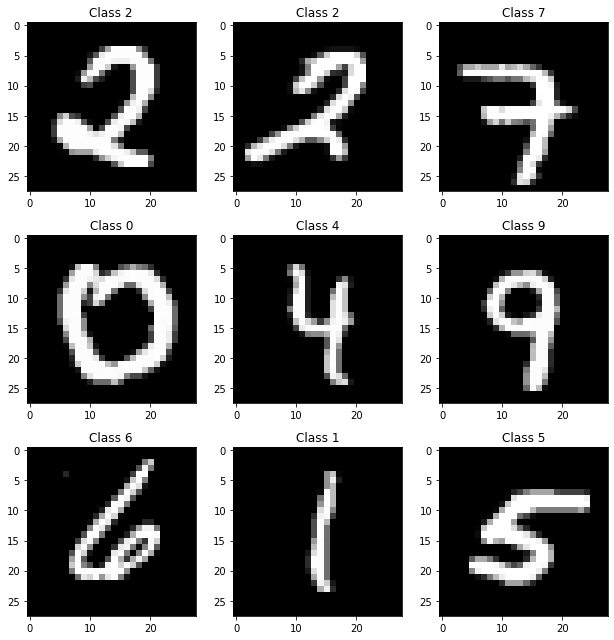

In [ ]:
plt.rcParams['figure.figsize']=(9,9)

for i in range(9):
  plt.subplot(3,3,i+1)
  num = random.randint(0, len(X_train))
  plt.imshow(X_train[num],cmap='gray', interpolation='none')
  plt.title("Class {}".format(y_train[num]))
  plt.tight_layout()

## **Printing the random image of MNIST dataset in Matrix format.**

Creating a function **matprint** that generates the matrix for the image chosen.

In [ ]:
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")
# now print!        
matprint(X_train[num])

0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  
0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  
0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  
0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  
0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  
0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  
0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  
0  0  0  0  0    0    0    0    0    0    0    0   36   65  125  164  164  164  164   77   65   65   65   65   40  0  0  0  


## **Reshaping the size of training and testing .**

The entire MNIST dataset consist 60,000 images and each image's pixel size is 28X28 (784 pixcels) which is taken in matrix form as row:28 and column:28 and the single channel(1) represents that the image is in black and white format.  

For training, the entire dataset is taken into account whereas for testing 10,000 data is taken in matrix format with single Channel.    

In [ ]:
X_train = X_train.reshape(60000, 28,28,1)  #add an additional dimension to represent the single-channel
X_test = X_test.reshape(10000, 28,28,1)

X_train = X_train.astype('float32')  #Change intergers to 32-bit floating point
X_test = X_test.astype('float32')


## **Normalizing pixel values.** 

Normalizing the train and test dataset by dividing it with 225. 

Our idea is to normalize the input in the range [0,1] rather than [0-255]. 



In [ ]:
X_train /=255    # normalize each value for pixel
X_test /=255

## **Modifying the classes (unique digits) into one-hot format.**

0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]

1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]

2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]
etc.

### **Comparing final output with the classes.**

If the final output is very close to one of these classes, then it is most likely that class. 

For example, if the final output is:
[0, 0, 0, 0, 0.94, 0, 0.06, 0, 0]
then it's most likely the image of digit 4.

In [ ]:
nb_classes = 10  # NO of unique nos

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)


## **DESIGNING NETWORK - CONVOLUTION** 

Convolution applies kernels (filters) that traverse through each image and generate feature maps.

## **Building Layers to the Network.**

Building the layer through the functin **Sequential()**

In [ ]:
# Sequenctial Model is a linear stack of layers and is very common

model=Sequential()

## **Creating the convolution layer.**

add() - To increment the stack layer in the model Sequential(). 

The parameters in convolution layer 
(Conv2D) includes,
strides,padding, data_format,dilation rate.
 

Here,
**batch size** = 32

**kernel size** = (3,3) - 3X3 matrix

**input_shape** = 28X28 pixcel with single channel.

In [ ]:
model.add(Conv2D(32,(3,3),input_shape=(28,28,1)))  # 32 different 3x3 kernels -- so 32 feature maps

<bound method Sequential.add of <keras.engine.sequential.Sequential object at 0x7fe7fd92b090>>

## **Batch Normalizing the inputs.**

Batch normalization applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1.

Batch Noemalisation is done in the hidden units.

Batch normalization standardizes the distribution of layer inputs to combat the internal covariance shift. It controls the amount by which the hidden units shift.

TO PERFORM BATCH NORMALIZATION.
https://towardsdatascience.com/what-is-batch-normalization-46058b4f583

AXIS.
To preserve the dimension of the array we normalise with respective maen and standard deviation over every other axis.
so batchnormalization with axis =1 gets subtracted with axis=0

In [ ]:
model.add(BatchNormalization(axis=-1))

## **Applying the Activation Function.**

The activation function function performed here is "relu" which takes the negative values as zero and the positive values remains the same. 
 

In [ ]:
convlayer01 = Activation("relu")

## **Adding the first convolution layer to  the model.**

In [ ]:
model.add(convlayer01)

## **Convolution Layer 2**



In [ ]:
model.add(Conv2D(32,(3,3)))    # 32 different 3x3 kernels -- so 32 feature maps

In [ ]:
model.add(BatchNormalization(axis=-1))

In [ ]:
convlayer02 = Activation("relu")

In [ ]:
model.add(convlayer02)

## **Convolution Layer 3**

In convo-layer 3, the batch size is increased to 64 and the model is performed.




In [ ]:
# Convolution Layer 3
model.add(Conv2D(64,(3, 3)))                         # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
convLayer03 = Activation('relu')                     # activation
model.add(convLayer03)

## **Convolution Layer 4**

In convo-layer 4, the max pooling is done with the pooling size 2X2.

**MAXPOOLING:** Highlighting the features of interst and reducing the number of learned parameters.In default, the strides in maxpooling moves of even order i.e, 2x2. 

In [ ]:
# Convolution Layer 4
model.add(Conv2D(64, (3, 3)))                        # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model.add(Activation('relu'))                        # activation
convLayer04 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model.add(convLayer04)
model.add(Flatten())  

## **Layer 5 - Creating Dense**

**Connecting the previous convo-layers.**

Dense() - dense layer contains densely connected neurons. 

The neurons in the dense layer get their source of input data from all the other neurons of the previous layer of the network.

The procedure for layer building follws.

*   BatchNormalization()
*   Activation('relu')




In [ ]:
#Fully Connected Layer 5
model.add(Dense(512))                                # 512 FCN nodes
model.add(BatchNormalization())                      # normalization
model.add(Activation('relu'))                        # activation

## **Layer 6 -Dropping out**

Here, 20% odf data is droped out,

The dropout layer is responsible for randomly skipping the neurons inside the neural network so that the overall odds of overfitting are reduced optimally.

Applying softmax to the final layer.

  The softmax function highlights the largest values and suppresses values which are significantly below the maximum value, though this is not true for small values.

  It normalizes the outputs so that they sum to 1 so that they can be directly treated as probabilities over the output.

  It is often used in the final layer in a classifier model with the categorical crossentropy as loss function.

In [ ]:
# Fully Connected Layer 6                       
model.add(Dropout(0.2))                              # 20% dropout of randomly selected nodes
model.add(Dense(10))                                 # final 10 FCN nodes
model.add(Activation('softmax'))  

## **Model Summary**

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 26, 26, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 24, 24, 32)        0

## **Compiling the Model**

setting the loss method.

  **Categorical crossentropy** - loss function used in multi-class classification tasks.

  These are tasks can only belong to one out of many possible categories, and model will decide which one to choose.

  It is designed to quantify the difference between two probability distributions.

  **Fixing the Optimizer** - Adam that holds the learning rate for the model.

In [ ]:
# we'll use the same optimizer

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## **Data Argumentation**

Data augmentation is used to increase the diversity of training which was set while applying the random transformations such as rotation of an image.

Data augmentation - increase the training set size while generating a new variant of the training set.

ImageDataGenerator - defines the configuration for image data.

Image configuration,

1. Random rotation, shifts, flips, and shears  
1.   Dimension reordering.
2.   Feature wise standardization
2.   Sample wise standardization
1.   Save augmented images to the disk.






In [ ]:
# data augmentation prevents overfitting by slightly changing the data randomly
# Keras has a great built-in feature to do automatic augmentation

gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

## **Training and testing the Generators.**

In [ ]:
# We can then feed our augmented data in batches
# Besides loss function considerations as before, this method actually results in significant memory savings
# because we are actually LOADING the data into the network in batches before processing each batch

# Before the data was all loaded into memory, but then processed in batches.

train_generator = gen.flow(X_train, Y_train, batch_size=128)
test_generator = test_gen.flow(X_test, Y_test, batch_size=128)

## **Fitting the model on Generators**

under model Fitting,

*   validation_data : Has the test Generator assigned under traineg_generator.

*   Validation_size : normalising test data (10,000) floor dividied (//) by generator batch size(128)

*   epochs : No. of runs in the layers


*   steps_per_epoch = normalising total data size by floor dividing with batch size 128. 












In [ ]:
# We can now train our model which is fed data by our batch loader
# Steps per epoch should always be total size of the set divided by the batch size

# SIGNIFICANT MEMORY SAVINGS (important for larger, deeper networks)

model.fit_generator(train_generator, steps_per_epoch=60000//128, 
                    epochs=5, verbose=1, 
                    validation_data=test_generator, validation_steps=10000//128)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


468/468 [==============================] - 488s 1s/step - loss: 0.0227 - accuracy: 0.9930 - val_loss: 0.0197 - val_accuracy: 0.9939
Epoch 2/5
468/468 [==============================] - 472s 1s/step - loss: 0.0227 - accuracy: 0.9926 - val_loss: 0.0143 - val_accuracy: 0.9947
Epoch 3/5
468/468 [==============================] - 473s 1s/step - loss: 0.0200 - accuracy: 0.9936 - val_loss: 0.0231 - val_accuracy: 0.9926
Epoch 4/5
468/468 [==============================] - 475s 1s/step - loss: 0.0194 - accuracy: 0.9940 - val_loss: 0.0269 - val_accuracy: 0.9922
Epoch 5/5
468/468 [==============================] - 472s 1s/step - loss: 0.0185 - accuracy: 0.9942 - val_loss: 0.0198 - val_accuracy: 0.9942


## **Evaluating the Test Score and Test Accuracy.**

In [ ]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 19s 62ms/step - loss: 0.0224 - accuracy: 0.9931
Test score: 0.022395357489585876
Test accuracy: 0.9930999875068665
